# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict whether a customer canceled their reservation using the provided `hotel_booking.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict  whether a customer canceled their reservation.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [2]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [4]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [5]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [6]:
df = pd.read_csv("hotel_bookings.csv")

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [12]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    desc = df.describe()
    return desc

In [13]:
calculate_descriptive_statistics(df)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,8.000000,5.000000


In [14]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    sns.pairplot(df)
    

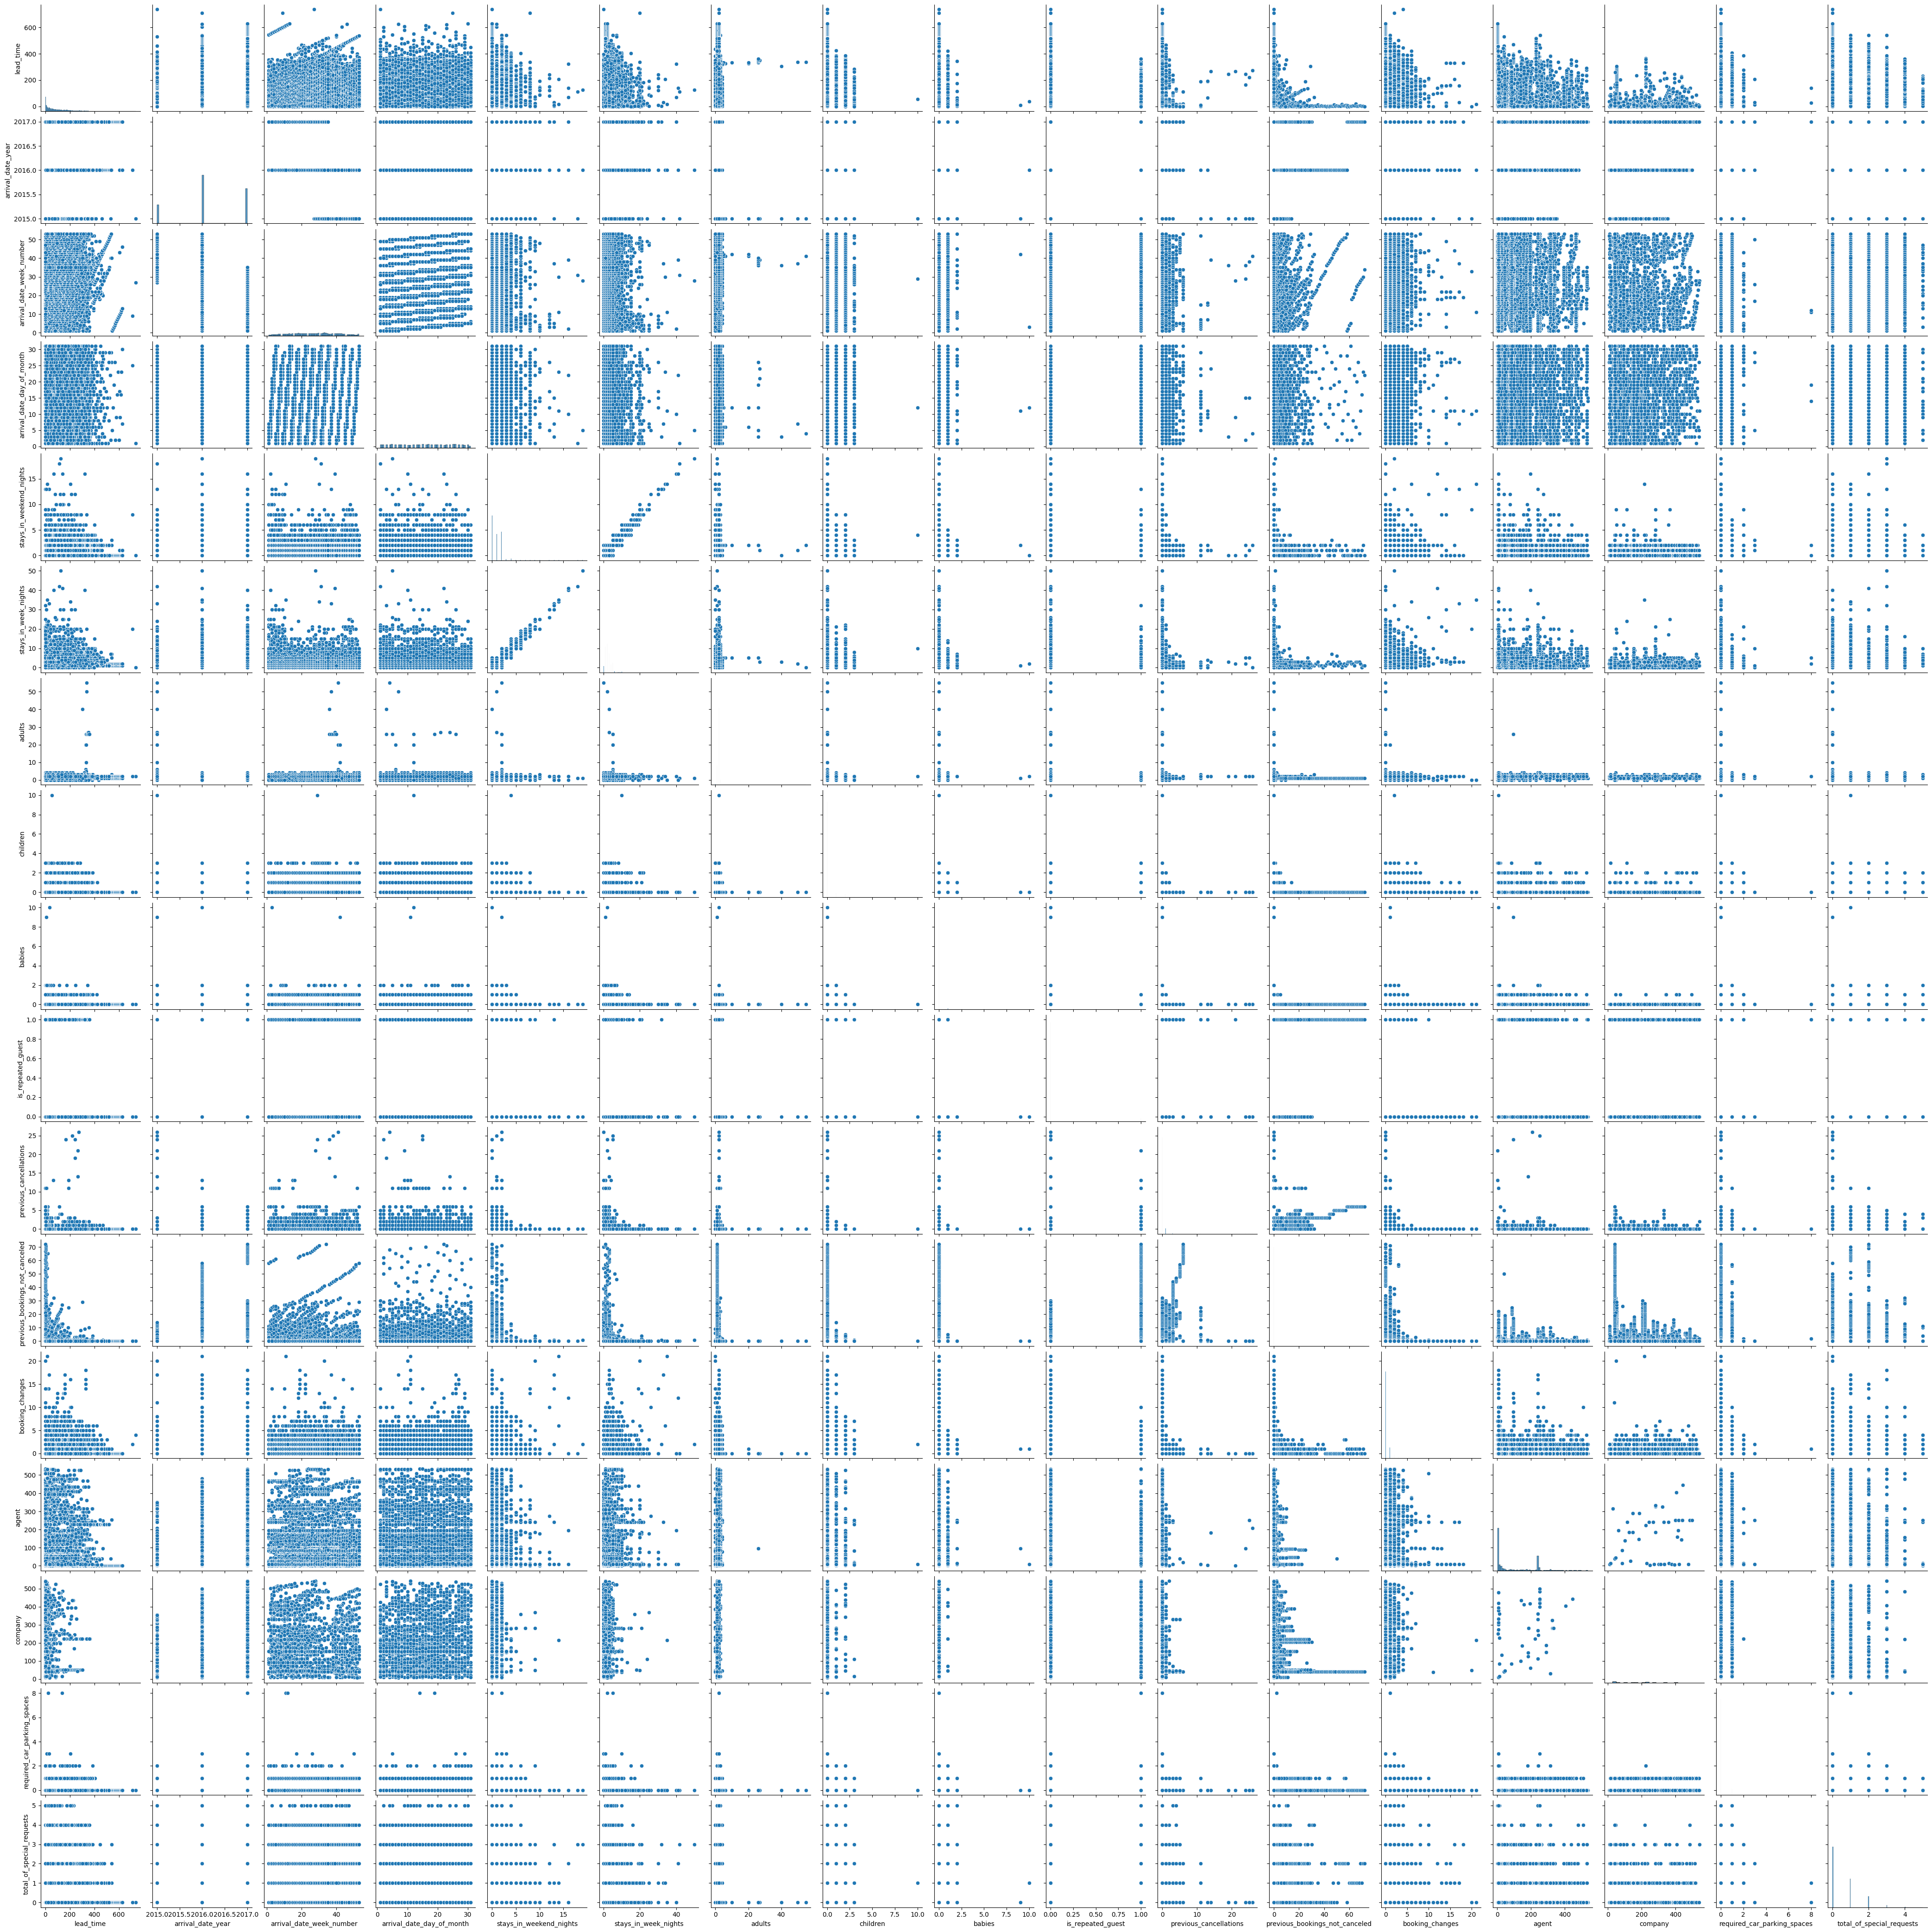

In [15]:
plot_pairwise_relationships(df)

In [16]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    sns.heatmap(df.corr(numeric_only=True), annot=True)

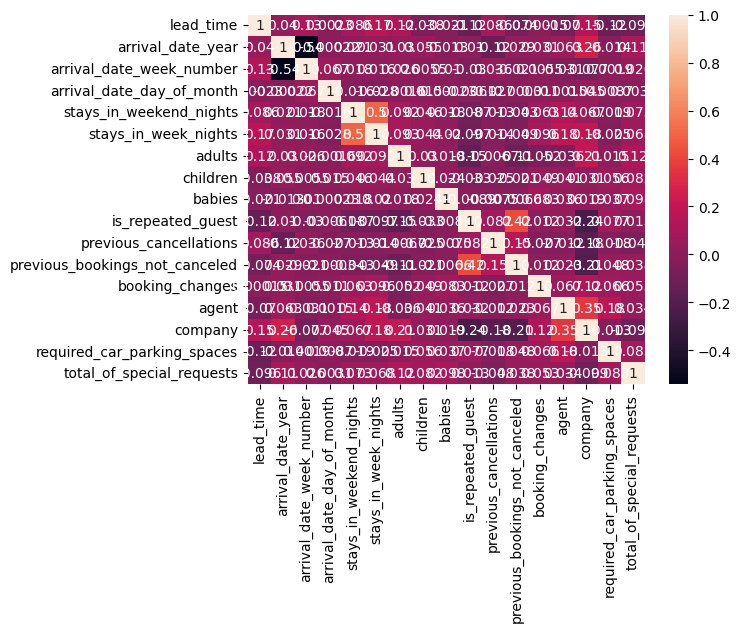

In [17]:
plot_correlation_intensity(df)

In [20]:
### MANUALLY GRADED TASK
def plot_lead_time_boxplot(df):
    """
    Create a boxplot showing how lead time differs between canceled and non-canceled bookings.
    """

    sns.boxplot(df, x="previous_bookings_not_canceled", y="lead_time")

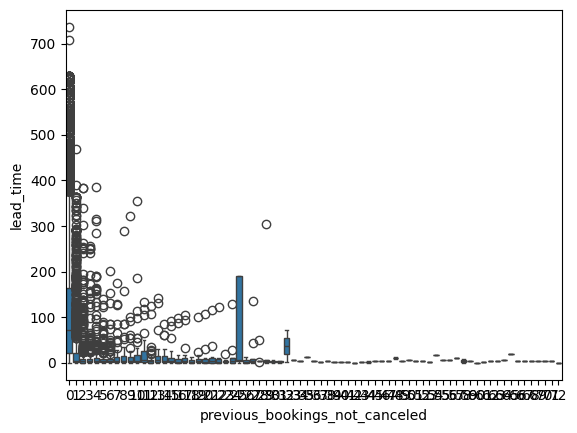

In [21]:
plot_lead_time_boxplot(df)

In [ ]:
### MANUALLY GRADED TASK
def plot_cancellation_counts(df):
    """
    Create a bar plot showing how many bookings were canceled vs not canceled.
    """

    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
plot_cancellation_counts(df)

In [ ]:
### AUTOMATICALLY GRADED TASK
def impute_children_mode(df):
    """
    Fill missing values in `children` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [ ]:
impute_children_mode(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_children_mode(_df)
assert hash_data_frame(_df) == "2f1c5dfe0828d78ea1a8f9c5976821a9a3eaca07cfe98326304d5972c11b361b"

In [ ]:
### AUTOMATICALLY GRADED TASK
def impute_country_mode(df):
    """
    Fill missing values in `country` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [ ]:
impute_country_mode(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_country_mode(_df)
assert hash_data_frame(_df) == "528991530f1e5408a3bcbcf681a1c62189e516366e6a767ce163320e705487e5"

In [ ]:
### MANUALLY GRADED TASK
def impute_agent_company_knn(df):
    """
    Impute missing values in `agent` and `company` using KNNImputer with the appropriate columns.
    
    Note: The imputed values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [ ]:
impute_agent_company_knn(df)

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_hotel(df):
    """
    Encode the `hotel` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return df

In [ ]:
encode_or_drop_hotel(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_hotel(_df)
assert hash_data_frame(_df) == "ddfef26391e08ec0e788486481c885ebeecda826fa125e665e4eeea6096b91c9"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_is_canceled(df):
    """
    Encode the `is_canceled` column manually:
    - "no"  -> 0
    - "yes" -> 1
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
encode_is_canceled(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_is_canceled(_df)
assert hash_data_frame(_df) == "bd5c6cf86d2ef9dc64162cb8d9d8be54b1247e6a0da08074085d6c4bf86b71df"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_arrival_date_month(df):
    """
    Encode the `arrival_date_month` column using OrdinalEncoder
    with fixed calendar order (January → December).

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [ ]:
encode_arrival_date_month(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_arrival_date_month(_df)
assert hash_data_frame(_df) == "5def409216f31ceb05b96377d444141c7e28cfca808a8481484ab0443a873c99"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_meal(df):
    """
    Encode the `meal` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
encode_or_drop_meal(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_meal(_df)
assert hash_data_frame(_df) == "1c7fbbbcd1b083a264a946bce4188949dd3d27882ce357b27e5ecddee7c3c3e2"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_country(df):
    """
    Encode the `country` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
encode_or_drop_country(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_country(_df)
print(hash_data_frame(_df))
assert hash_data_frame(_df) == "be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_customer_type(df):
    """
    Encode the `customer_type` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
encode_or_drop_customer_type(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_customer_type(_df)
assert hash_data_frame(_df) == "6c55892a0f98882ac8720b5ec0350a71cfb936ebcde9472c604ce364ce1da6a5"

In [ ]:
### AUTOMATICALLY GRADED TASK
def encode_deposit_type(df):
    """
    Encode the `deposit_type` column using OrdinalEncoder
    with fixed order ['No Deposit', 'Non Refund', 'Refundable'].

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
encode_deposit_type(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_deposit_type(_df)
assert hash_data_frame(_df) == "d580508ad442d05888f34e34be95f40be99758e97d57cf98bc5085ff48df32ba"

In [ ]:
### AUTOMATICALLY GRADED TASK
def combine_person_columns(df):
    """
    Create a new column 'total_persons' as the sum of 'adults', 'children', and 'babies'.
    Then drop the original three columns.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return df

In [ ]:
combine_person_columns(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = combine_person_columns(_df)
assert hash_data_frame(_df) == "f0d93e268feae1e4416b8f414b214844f2f265115d1a6a9c867586278d94b859"

In [ ]:
### AUTOMATICALLY GRADED TASK
def create_room_match_column(df):
    """
    Create a new Boolean column 'room_match' that indicates whether
    the reserved room type matches the assigned room type.
    Then drop the original two columns.

    Return the updated DataFrame.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

    return df


In [ ]:
create_room_match_column(df)

In [ ]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = create_room_match_column(_df)
assert hash_data_frame(_df) == "4d99349e3d7901bb36e2752e8eb34a42d9a84fc4dba6dec68f6435111985efef"

In [ ]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return train_X, test_X, train_y, test_y

In [ ]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [ ]:
_df = pd.read_csv("hotel_bookings.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "9ac702152f9fbb53b83066adf10226413d2e61a67941fa6297335ef1912e0523"
assert hash_data_frame(_test_X) == "2f646b11dd0038298d3c0e990a795266f1deb2efa996ab2eb5fa40a833167b79"
assert hash_series(_train_y) == "97d345bcc07a58c45d8353e65862fb370191c4b7e6c9dd9c99eb3423f943977f"
assert hash_series(_test_y) == "a043cd1df6fd8349f79098436bdc8ccd4df94ae494784fab62a4716044dbea53"

In [ ]:
### MANUALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a suitable model.
    
    Return the trained model.
    """

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return model

In [ ]:
model = fit_model(train_X, train_y)

In [ ]:
pred_y = model.predict(test_X)

In [ ]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
evaluate_model(test_y, pred_y)